# Autism Prediction

A_Score Feature

A1_Score to A10_score is a Score based on Autism Spectrum Quotient (AQ)10 item screening tool. it's a binary value ( 0 or 1 )

In [1]:
%pip install ydata_profiling
%pip install seaborn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ydata_profiling as pp
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
from collections import Counter
from sklearn import metrics
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

  Using cached ydata_profiling-4.7.0-py2.py3-none-any.whl.metadata (20 kB)
  Using cached pydantic-2.7.1-py3-none-any.whl.metadata (107 kB)
  Using cached visions-0.7.6-py3-none-any.whl.metadata (11 kB)
  Using cached phik-0.12.4-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
  Using cached statsmodels-0.14.2-cp310-cp310-win_amd64.whl.metadata (9.5 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata (3.5 kB)
  Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
Using cached ydata_profiling-4.7.0-py2.py3-none-any.whl (357 kB)
Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
Using cached phik-0.12.4-cp310-cp310-win_amd64.whl (666 kB)
Using cached pydantic-2.7.1-py3-none-any.whl (409 kB)
Using cached statsmodels-0.14.2-cp310-cp310-win_amd64.whl (9.8 MB)
Using cached visions-0.7.6-py3-none-any.whl (104 kB)
Using cached pandas-2.2.2-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.95.0 requires pydantic!=1.7,!=1.7.1,!=1.7.2,!=1.7.3,!=1.8,!=1.8.1,<2.0.0,>=1.6.2, but you have pydantic 2.7.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


c:\Users\prans\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# from google.colab import files

# # Prompt user to upload a file
# uploaded = files.upload()

# # Access the uploaded file
# for filename in uploaded.keys():
#     print(f'Uploaded file: {filename}')


In [4]:
df = pd.read_csv('train.csv')

print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score        age gender       ethnicity jaundice  \
0         0         1          1  38.172746      f               ?       no   
1         0         0          0  47.750517      m               ?       no   
2         1         1          1   7.380373      m  White-European       no   
3         0         0          0  23.561927      f               ?       no   
4         0         0          0  43.205790      m               ?       no   

  austim  contry_of_res used_app_before     result

In [5]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [7]:
df.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [8]:
df.shape

(800, 22)

In [9]:
df.size

17600

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

# ChecK Data Cleaning

In [11]:
df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [12]:
df.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [13]:
df.duplicated().sum()

0

to drop duplicated if there is --->
**df.drop_duplicates(inplace=True)**

In [14]:
df["ethnicity"].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [15]:
df["austim"].value_counts()

austim
no     669
yes    131
Name: count, dtype: int64

In [16]:
df["jaundice"].value_counts()

jaundice
no     615
yes    185
Name: count, dtype: int64

# EDA and Data Understanding by Amazing and Interactive Visuals

In [17]:
%pip install ipywidgets
ProfileReport(df)

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   ---------------------------------------- 139.4/139.4 kB 8.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ---------------------------------------- 215.0/215.0 kB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.3 MB 18.3 MB/s eta 0:00:01
   ------------------------------------- -- 2.2/2.3 MB 23.2 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 18.3 MB/s eta 0:00:00
  Attempting uninstall: comm
    Found existing installation: comm 0.1.2
    Uninstalling comm-0.1.2:
      Successfully uninstalled comm-0.1.2
Note: you may need to restart the kernel to use updated packages.


Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.81s/it]


([<matplotlib.axis.XTick at 0x19fefa7e290>,
 [Text(0, 0, 'A1'),
  Text(1, 0, 'A2'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'A4'),
  Text(4, 0, 'A5'),
  Text(5, 0, 'A6'),
  Text(6, 0, 'A7'),
  Text(7, 0, 'A8'),
  Text(8, 0, 'A9')])

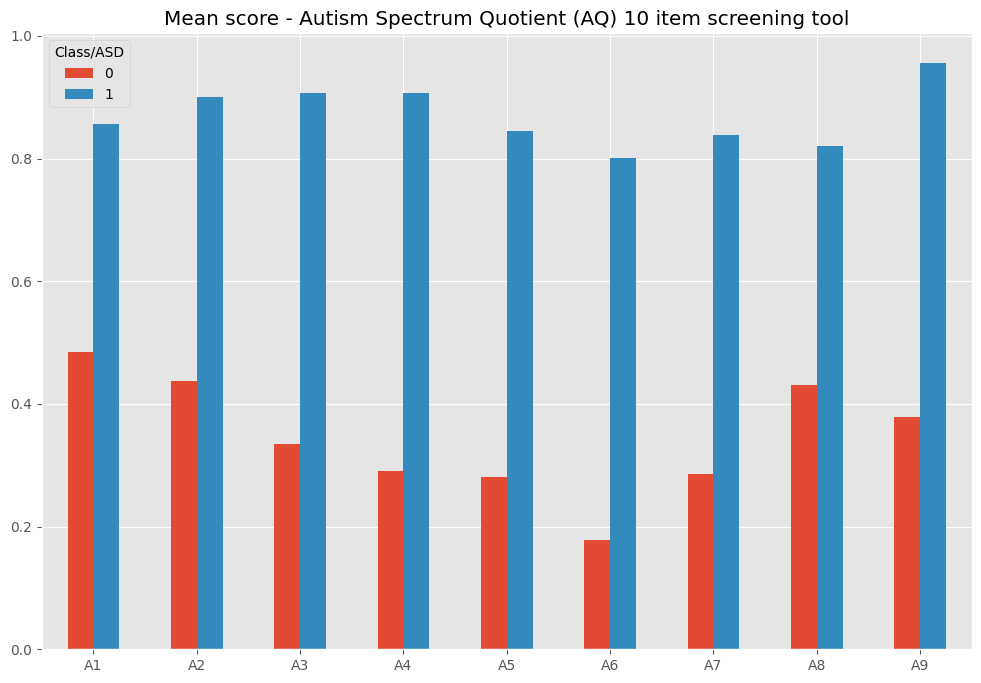

In [18]:
score_features = df.filter(regex='A[0-9]_', axis=1).columns.tolist()
#This line groups the train_data DataFrame by the 'Class/ASD' column and calculates the mean for the columns specified by score_features
df.groupby('Class/ASD')[score_features].mean().T.plot.bar()
plt.title('Mean score - Autism Spectrum Quotient (AQ) 10 item screening tool')
plt.xticks(ticks=range(len(score_features)), labels=[x.split('_')[0] for x in score_features], rotation=0)

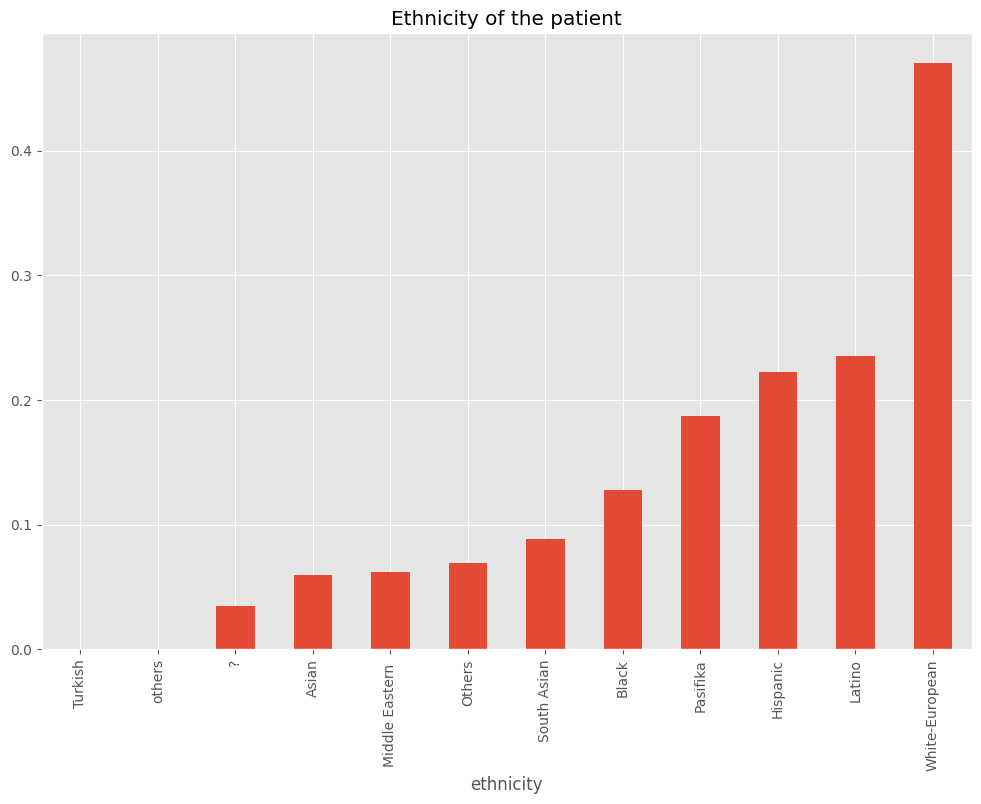

In [19]:
#Visualization of Ethnicity of the patient

df.groupby('ethnicity')['Class/ASD'].mean().sort_values().plot.bar()
plt.title('Ethnicity of the patient')
plt.xticks();

In [20]:
def convertAge(age):

    if age < 4:

        return 'Toddler'

    elif age < 12:

        return 'Kid'

    elif age < 18:

        return 'Teenager'

    elif age < 40:

        return 'Young'

    else:

        return 'Senior'


df['ageGroup'] = df['age'].apply(convertAge)

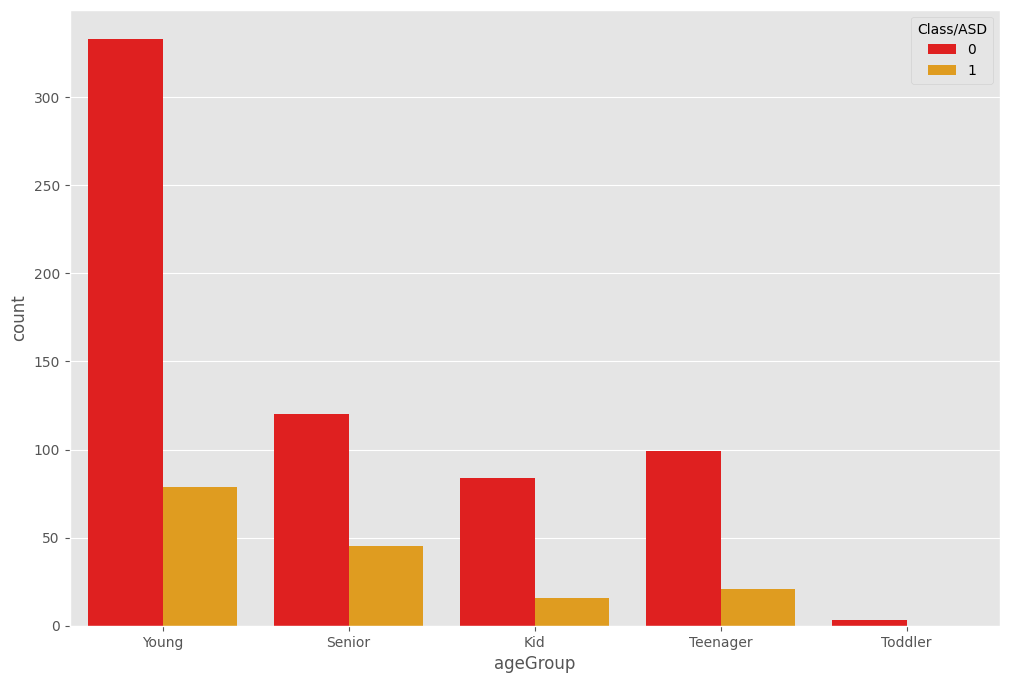

In [ ]:
sns.countplot(x=df['ageGroup'], hue=df['Class/ASD'], palette=['red', 'orange'])  # Custom list of colors
plt.show()

In [21]:
ints = []
objects = []
floats = []

for col in df.columns:
 if df[col].dtype == int:
  ints.append(col)
 elif df[col].dtype == object:
  objects.append(col)
 else:
  floats.append(col)

In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')

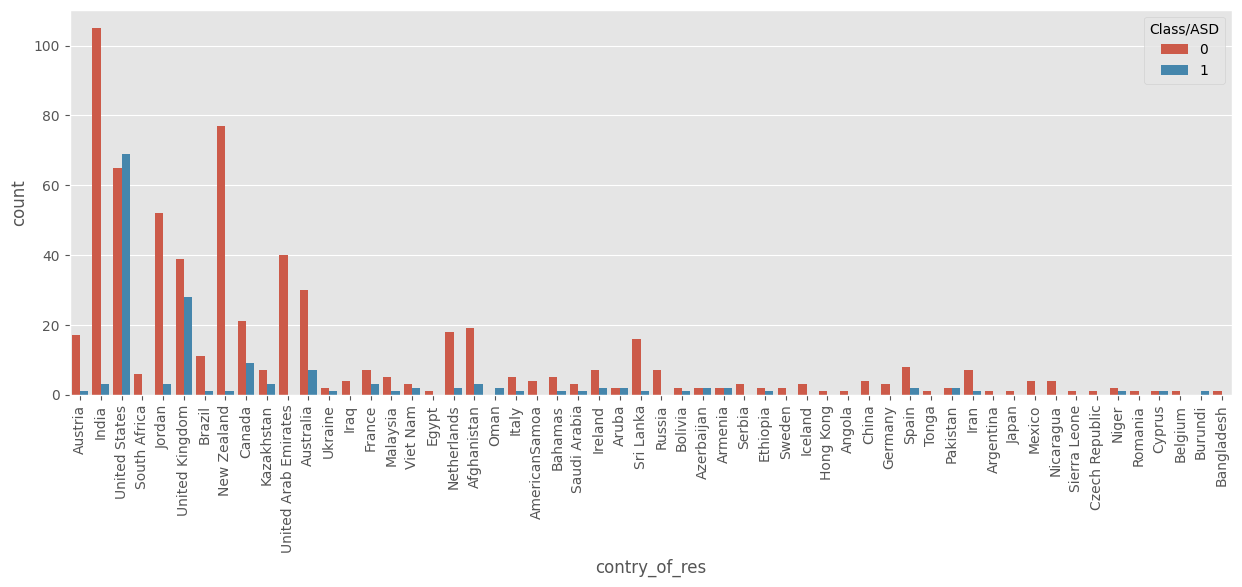

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

In [22]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [23]:
%pip install nbformat
import plotly.express as px

# Assuming 'train_data' is your DataFrame
autism_colors = ['pink', 'purple']

# Grouping data to get counts
autism_counts = df['Class/ASD'].value_counts().reset_index()
autism_counts.columns = ['Class/ASD', 'Count']

# Plotting donut chart
fig = px.pie(autism_counts, names='Class/ASD', values='Count', hole=0.7, color_discrete_sequence=autism_colors,
             title='VISUALIZATION OF TOTAL AUTISM SPECTRUM DISORDER (ASD)')

fig.show()

   ---------------------------------------- 0.0/78.5 kB ? eta -:--:--
   ---------------------------------------- 78.5/78.5 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
#Visualization of country of residence of the patient - Treemap

fig = px.treemap(df, path=['contry_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='plotly3',
)

fig.update_layout(title="<b> COUNTRY OF RESIDENCE OF THE PATIENT - TREEMAP <b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=500, width=1000,
                  template='simple_white',
                  autosize=False,
                  margin=dict(l=50,r=50,b=50, t=250,
                             ),
                 )
fig.update_layout(margin = dict(t=50, l=50, r=50, b=100))
fig.show()

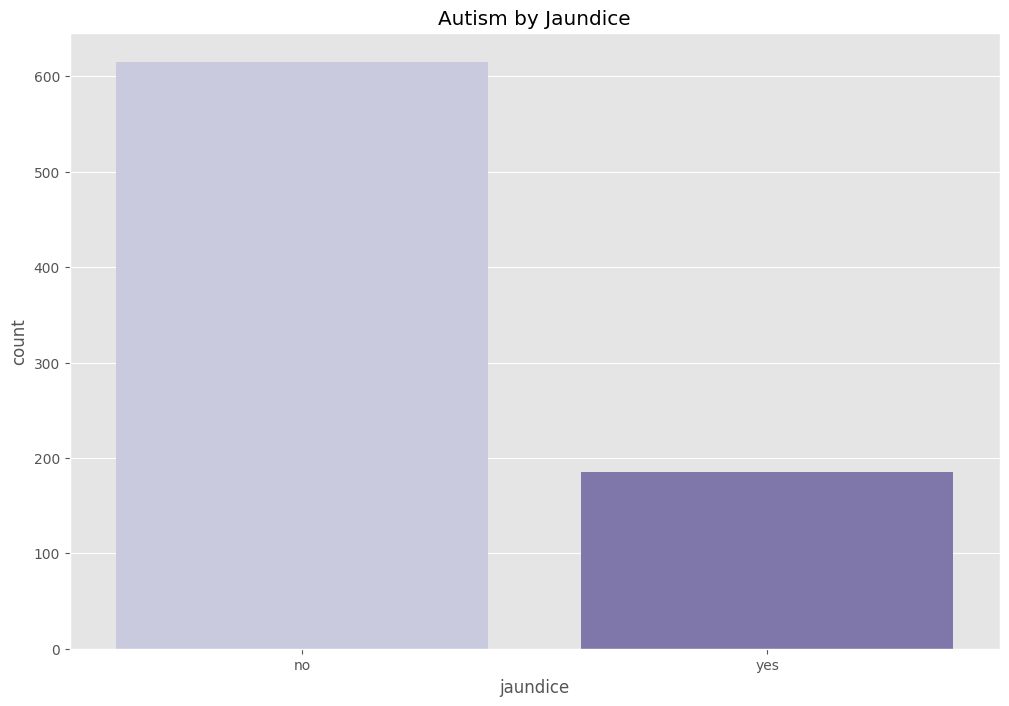

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.countplot(x="jaundice", data=df, palette="Purples")
plt.title('Autism by Jaundice')
plt.show()


# Modeling

In [26]:
features = [
    'gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'age'
]

In [27]:
%pip install lazypredict

  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install lazypredict
import lazypredict

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.model_selection import train_test_split

# Define the features
features = ['gender', 'ethnicity', 'jaundice', 'austim', 'age']

# Extract features and target variable
X = df[features]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [34]:
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.

ros = RandomOverSampler(sampling_strategy='minority',random_state=0)

X, Y = ros.fit_resample(X_train,y_train)
X.shape, Y.shape

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   --------------------------------------  256.0/258.0 kB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


((1012, 5), (1012,))

In [35]:
# Check for any columns with string values
string_columns = df.select_dtypes(include=["object"]).columns
from sklearn.preprocessing import LabelEncoder

# Convert string columns to numeric values using LabelEncoder
le = LabelEncoder()
for col in string_columns:
    df[col] = le.fit_transform(df[col])

# Extract features and target variable
X = df[features]
y = df['Class/ASD']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Balance the data using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,y_train)

# Normalize the features using RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)

# Transform the validation



In [36]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=2,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 14%|█▍        | 4/29 [00:00<00:01, 13.24it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.6473127262600946, 'ROC AUC': 0.6473127262600947, 'F1 Score': 0.8047849975266766, 'Time taken': 0.14640235900878906}
{'Model': 'BaggingClassifier', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6733500417710944, 'ROC AUC': 0.6733500417710944, 'F1 Score': 0.8222876004592422, 'Time taken': 0.046000003814697266}
{'Model': 'BernoulliNB', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6438318017265385, 'ROC AUC': 0.6438318017265385, 'F1 Score': 0.8159926470588236, 'Time taken': 0.014002799987792969}
{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.11600065231323242}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.775, 'Balanced Accuracy': 0.6727930938457254, 'ROC AUC': 0.6727930938457256, 'F1 Score': 0.7881835937499999, 'Time taken': 0.029997587203979492}
{'Model': 'DummyClassifier', 'Accuracy': 0.83

 48%|████▊     | 14/29 [00:00<00:00, 22.99it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.6027568922305764, 'ROC AUC': 0.6027568922305764, 'F1 Score': 0.7795959649494735, 'Time taken': 0.18399667739868164}
{'Model': 'GaussianNB', 'Accuracy': 0.79375, 'Balanced Accuracy': 0.6397939292676135, 'ROC AUC': 0.6397939292676135, 'F1 Score': 0.7952358490566038, 'Time taken': 0.011036157608032227}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.8125, 'Balanced Accuracy': 0.6363130047340573, 'ROC AUC': 0.6363130047340573, 'F1 Score': 0.8063888888888888, 'Time taken': 0.028863906860351562}
{'Model': 'LabelPropagation', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.5879977722082985, 'ROC AUC': 0.5879977722082985, 'F1 Score': 0.7760359720096216, 'Time taken': 0.023001909255981445}
{'Model': 'LabelSpreading', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.5879977722082985, 'ROC AUC': 0.5879977722082985, 'F1 Score': 0.7760359720096216, 'Time taken': 0.0280001163482666}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy

 62%|██████▏   | 18/29 [00:00<00:00, 26.97it/s]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.83125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.7546501706484643, 'Time taken': 0.03399825096130371}
{'Model': 'Perceptron', 'Accuracy': 0.74375, 'Balanced Accuracy': 0.713032581453634, 'ROC AUC': 0.713032581453634, 'F1 Score': 0.7698940462829352, 'Time taken': 0.022982120513916016}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.6620718462823726, 'ROC AUC': 0.6620718462823726, 'F1 Score': 0.807645797598628, 'Time taken': 0.026999473571777344}


 86%|████████▌ | 25/29 [00:01<00:00, 16.16it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.78125, 'Balanced Accuracy': 0.6175160122528544, 'ROC AUC': 0.6175160122528544, 'F1 Score': 0.7828259005145797, 'Time taken': 0.4650003910064697}
{'Model': 'RidgeClassifier', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.04799795150756836}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.825, 'Balanced Accuracy': 0.6290726817042607, 'ROC AUC': 0.6290726817042607, 'F1 Score': 0.8123373532211996, 'Time taken': 0.027011394500732422}
{'Model': 'SGDClassifier', 'Accuracy': 0.80625, 'Balanced Accuracy': 0.5735171261487051, 'ROC AUC': 0.5735171261487051, 'F1 Score': 0.7853150449164639, 'Time taken': 0.028998851776123047}
{'Model': 'SVC', 'Accuracy': 0.83125, 'Balanced Accuracy': 0.6180729601782233, 'ROC AUC': 0.6180729601782233, 'F1 Score': 0.8130163294433717, 'Time taken': 0.04499554634094238}


 97%|█████████▋| 28/29 [00:03<00:00,  5.01it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.81875, 'Balanced Accuracy': 0.6843497632971317, 'ROC AUC': 0.6843497632971317, 'F1 Score': 0.8200557461406517, 'Time taken': 1.6370124816894531}
[LightGBM] [Info] Number of positive: 134, number of negative: 506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.209375 -> initscore=-1.328697
[LightGBM] [Info] Start training from score -1.328697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████| 29/29 [00:03<00:00,  7.91it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.7625, 'Balanced Accuracy': 0.6209969367864104, 'ROC AUC': 0.6209969367864105, 'F1 Score': 0.7716346153846155, 'Time taken': 0.4959981441497803}


In [37]:
models


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.75,0.73,0.73,0.78,0.03
Perceptron,0.74,0.71,0.71,0.77,0.02
XGBClassifier,0.82,0.68,0.68,0.82,1.64
BaggingClassifier,0.82,0.67,0.67,0.82,0.05
DecisionTreeClassifier,0.78,0.67,0.67,0.79,0.03
QuadraticDiscriminantAnalysis,0.81,0.66,0.66,0.81,0.03
AdaBoostClassifier,0.81,0.65,0.65,0.80,0.15
BernoulliNB,0.82,0.64,0.64,0.82,0.01
LinearDiscriminantAnalysis,0.82,0.64,0.64,0.81,0.02


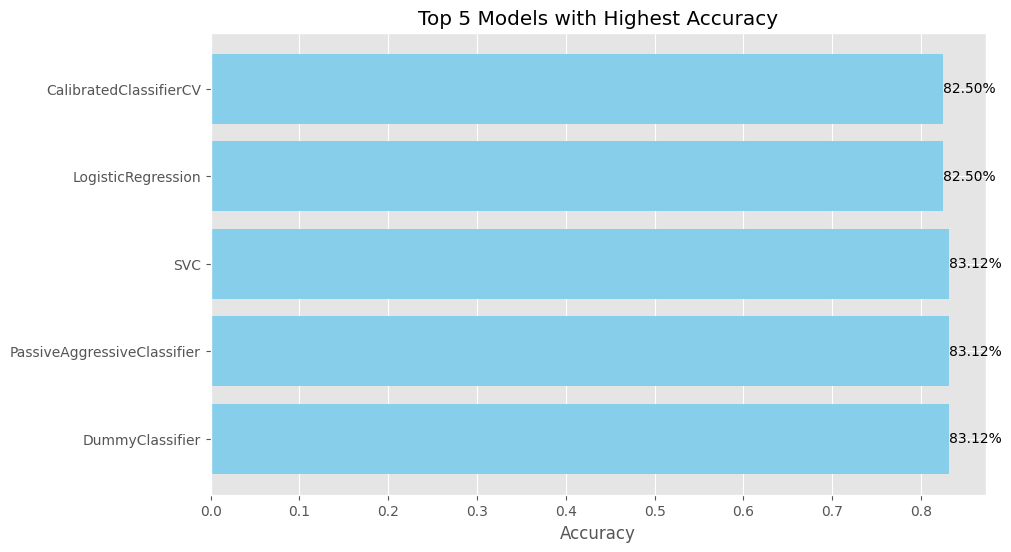

In [38]:
# Sort the models by accuracy in descending order (highest first)
top_models = models.sort_values(by='Accuracy', ascending=False).head(5)

# Plot the top 5 models and their accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(top_models.index, top_models['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Top 5 Models with Highest Accuracy')

# Display percentages on top of the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2%}',
             va='center', color='black', fontsize=10)

plt.show()

In [48]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import roc_auc_score
import pickle


# Assuming X_train and X_test represent your input data, and y_train and y_test represent your labels
X_train = np.random.rand(1012, 5)  # Example input data
y_train = np.random.randint(0, 2, size=(1012,))  # Example labels
X_test = np.random.rand(1012, 5)  # Example input data
y_test = np.random.randint(0, 2, size=(1012,))  # Example labels

# Reshape input data to represent a single-channel "image"
X_train_reshaped = X_train.reshape((-1, 5, 1))
X_test_reshaped = X_test.reshape((-1, 5, 1))

# Define the CNN models
models = [
    Sequential([
        Conv1D(32, 3, activation='relu', input_shape=(5, 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(2, activation='softmax')  # Change the number of units to match the number of classes
    ]),
    # Add more CNN models here as needed
]

# Create an empty list to store results
results = []

# Loop through each CNN model
print("Training the models...")
for model in models:
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Use sparse categorical cross-entropy for integer labels
                  metrics=['accuracy'])

    # Fit the model
    model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=0)

    # Calculate training and validation accuracy
    train_accuracy = roc_auc_score(y_train, model.predict(X_train_reshaped)[:, 1])  # Use the predicted probabilities for the positive class
    val_accuracy = roc_auc_score(y_test, model.predict(X_test_reshaped)[:, 1])  # Use the predicted probabilities for the positive class

    # Append results to the list
    results.append([str(model), train_accuracy, val_accuracy])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'Training AUC', 'Validation AUC'])

# Sort the DataFrame by 'Validation AUC' column in descending order
results_df = results_df.sort_values(by='Validation AUC', ascending=False)

# Reset index to maintain the order
results_df = results_df.reset_index(drop=True)

# Display the DataFrame
print(results_df)


Training the models...
1
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
                                        Model  Training AUC  Validation AUC
0  <Sequential name=sequential_5, built=True>          0.51            0.52


In [57]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import pickle
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%pip install scikit-learn
from sklearn.neighbors import KNeighborsClassifier

models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf'),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB(),
    MLPClassifier(),
    BaggingClassifier(),
    # Add more models here as needed
]
for i in range(len(models)):
    model = models[i]
    model.fit(X, Y)
    
    pickle.dump(model, open(f'{model.__class__.__name__}.pkl', 'wb'))

    print(f'{model} : ')

    # Getting predictions
    train_predictions = model.predict(X)
    val_predictions = model.predict(X)

    # Printing confusion matrices
    print('Training Confusion Matrix : ')
    print(confusion_matrix(Y, train_predictions))
    print('Validation Confusion Matrix : ')
    print(confusion_matrix(Y, val_predictions))



    print()


LogisticRegression() : 
Training Confusion Matrix : 
[[367 139]
 [ 80 426]]
Validation Confusion Matrix : 
[[367 139]
 [ 80 426]]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Confusion Matrix : 
[[493  13]
 [  0 506]]
Validation Confusion Matrix : 
[[493  13]
 [  0 506]]

SVC() : 
Training Confusion Matrix : 
[[358 

In [42]:

models = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel='rbf'),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    GaussianNB(),
    MLPClassifier(),
    BaggingClassifier(),
    # Add more models here as needed
]


for model in models:

  model.fit(X, Y)


  print(f'{model} : ')

  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))

  print('Validation Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))

  print()

LogisticRegression() : 
Training Accuracy :  0.7835968379446641
Validation Accuracy :  0.7835968379446641

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  0.9871541501976285
Validation Accuracy :  0.9871541501976285

SVC() : 
Training Accuracy :  0.7806324110671937
Validation Accuracy :  0.7806324110671937

R

In [43]:
import pandas as pd
from sklearn.metrics import roc_auc_score

# Create an empty list to store results
results = []

# Loop through each model
for model in models:
    # Fit the model
    model.fit(X, Y)

    # Calculate training and validation accuracy
    train_accuracy = roc_auc_score(Y, model.predict(X))
    val_accuracy = roc_auc_score(Y, model.predict(X))

    # Append results to the list
    results.append([str(model), train_accuracy, val_accuracy])

# Create a DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'Training Accuracy', 'Validation Accuracy'])

# Sort the DataFrame by 'Validation Accuracy' column in descending order
results_df = results_df.sort_values(by='Validation Accuracy', ascending=False)

# Reset index to maintain the order
results_df = results_df.reset_index(drop=True)

# Display the DataFrame
print(results_df.to_string(index=False))


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Model  Training Accuracy  Validation Accuracy
                                                                                                                                                                                                                                             